<a href="https://colab.research.google.com/github/jantheres/Topic-Modeling-/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim scikit-learn pyLDAvis nltk matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from gensim import corpora, models
import pyLDAvis.gensim
import nltk
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from gensim.models import Word2Vec
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

processed_docs = [preprocess(doc) for doc in documents]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:


# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Build LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Display topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.015*"writes" + 0.015*"lines" + 0.014*"organization" + 0.014*"subject" + 0.012*"article"')
(1, '0.052*"x" + 0.022*"gun" + 0.009*"guns" + 0.007*"control" + 0.007*"weapon"')
(2, '0.012*"god" + 0.009*"one" + 0.008*"would" + 0.008*"people" + 0.005*"subject"')
(3, '0.008*"israel" + 0.006*"subject" + 0.006*"organization" + 0.006*"lines" + 0.005*"writes"')
(4, '0.010*"people" + 0.009*"government" + 0.006*"would" + 0.005*"said" + 0.004*"us"')
(5, '0.007*"use" + 0.007*"file" + 0.006*"subject" + 0.006*"image" + 0.006*"key"')
(6, '0.045*"p" + 0.045*"r" + 0.041*"g" + 0.040*"max" + 0.036*"q"')
(7, '0.016*"lines" + 0.015*"subject" + 0.015*"organization" + 0.008*"university" + 0.006*"drive"')
(8, '0.015*"space" + 0.005*"nasa" + 0.005*"earth" + 0.005*"may" + 0.004*"research"')
(9, '0.013*"game" + 0.012*"team" + 0.008*"games" + 0.007*"year" + 0.006*"hockey"')


In [ ]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=processed_docs, vector_size=100, window=5, min_count=2, workers=4)
word2vec_model.train(processed_docs, total_examples=len(processed_docs), epochs=10)

# Get the average word embedding for each document
def get_average_embedding(doc):
    vectors = [word2vec_model.wv[word] for word in doc if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

document_embeddings = np.array([get_average_embedding(doc) for doc in processed_docs])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


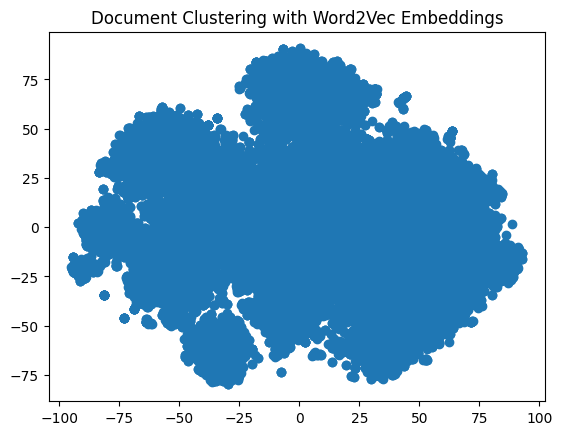

In [ ]:

# Calculate cosine similarity between document embeddings
similarity_matrix = cosine_similarity(document_embeddings)

# Cluster documents using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(document_embeddings)

# Visualize the clusters
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title("Document Clustering with Word2Vec Embeddings")
plt.show()


In [ ]:
# @title Default title text
import pyLDAvis
import pyLDAvis.gensim

# Visualize the LDA topics
lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
